#### General Dataset Management

##### Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

##### Cleaning DataFrame

In [2]:
scores: pd.DataFrame = pd.read_csv("./NFLscores.csv", engine="pyarrow", dtype_backend="pyarrow")
scores = scores.dropna()
scores["Date"] = pd.to_datetime(scores["Date"])
scores = scores[scores["Type"] == "Regular Season"]
scores = scores.reset_index()

#### Creating Columns

In [3]:
scores["Total Points"] = scores["WTS"] + scores["LTS"]
scores["Point Differentials"] = scores["WTS"] - scores["LTS"]
scores = scores[["Date", "DOW", "WT", "LT", "WTS", "LTS", "Total Points", "Point Differentials", "Season"]]

#### Creating Serieses

##### Creating Total Points Series

In [4]:
season_total: pd.Series = scores.groupby("Season")["Total Points"].sum()

##### Creating Point Differentials Series

In [5]:
point_differentials: pd.Series = scores.groupby("Season")["Point Differentials"].sum()

##### Creating Number of Teams Series

In [6]:
teams: pd.DataFrame = pd.DataFrame({"Season":pd.concat([scores["Season"], scores["Season"]]), "Teams":pd.concat([scores["WT"], scores["LT"]])})
teams = (teams.sort_values(["Season"])).reset_index()
unique_teams: pd.Series = teams.groupby("Season")["Teams"].nunique()

##### Creating Total Games Series

In [7]:
games: pd.Series = scores["Season"].value_counts()
games = games.sort_index()

##### Creating Day of the Week Series

In [8]:
day_of_week: pd.Series = scores.groupby("DOW")["Total Points"].sum()
day_of_week = day_of_week.reindex(["Sun", "Mon", "Tue", "Wed", "Thu", "Fri", "Sat"])

##### Creating Team Points Series

In [9]:
team_scores: pd.DataFrame = pd.DataFrame({"Teams":pd.concat([scores["WT"], scores["LT"]]), "Points":pd.concat([scores["WTS"], scores["LTS"]])})
team_scores = team_scores.reset_index()
team_scores.drop(columns="index")
team_points: pd.Series = team_scores.groupby("Teams")["Points"].sum()
team_points = team_points.sort_index()
team_points.loc["Other Franchises (<4000 pts.)"] = team_points[team_points < 4000].sum()
team_points = team_points[team_points >= 4000]
team_points = team_points[::-1]

#### Combining Serieses into DataFrame

In [10]:
season_stats:pd.DataFrame = pd.DataFrame({"Total Points": season_total, "Teams": unique_teams,"Games": games, "Point Differentials":point_differentials})
season_stats["Average Points Per Team"] = season_stats["Total Points"] / season_stats["Teams"]
season_stats["Average Points Per Game"] = season_stats["Total Points"] / season_stats["Games"]
season_stats["Average Point Differentials Per Game"] = season_stats["Point Differentials"] / season_stats["Games"]

#### Plotting

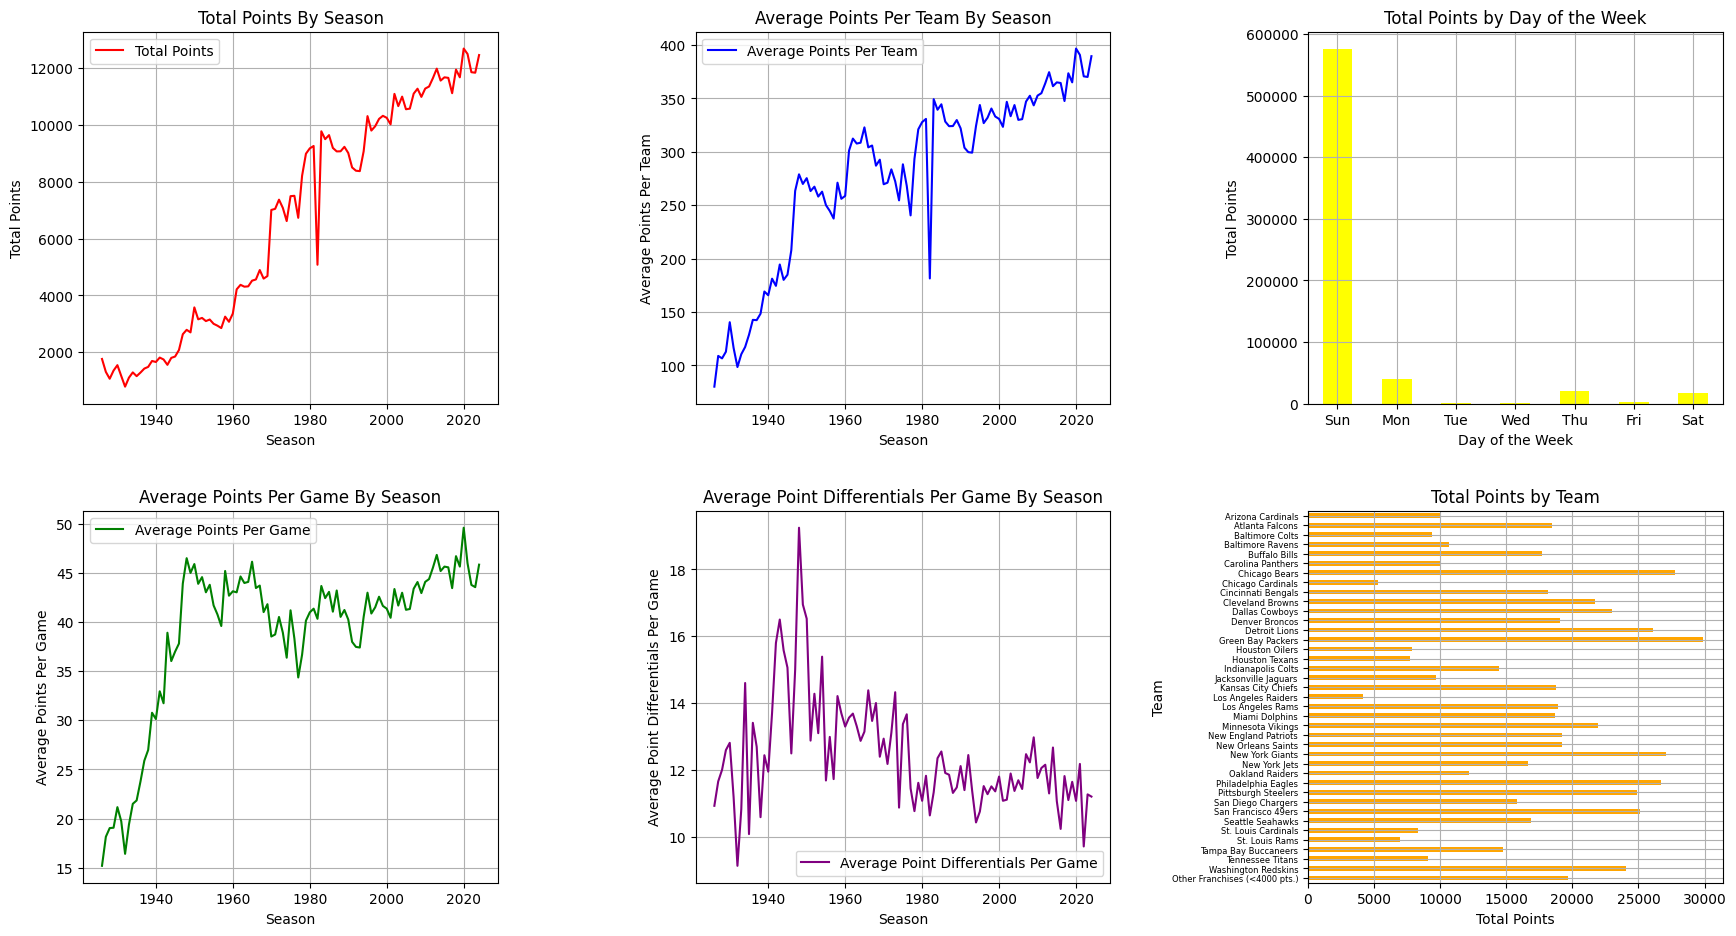

In [11]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2,3, figsize=(18,10))

season_stats.plot(
    ax=ax1,
    color="red",
    y="Total Points",
    kind="line",
    title="Total Points By Season",
    grid=True,
    xlabel="Season",
    ylabel="Total Points"
)

season_stats.plot(
    ax=ax2,
    color="blue",
    y="Average Points Per Team",
    kind="line",
    title="Average Points Per Team By Season",
    grid=True,
    xlabel="Season",
    ylabel="Average Points Per Team"
)

day_of_week.plot(
    ax=ax3,
    color="yellow",
    kind="bar",
    title="Total Points by Day of the Week",
    grid=True,
    xlabel="Day of the Week",
    ylabel="Total Points",
    rot=False
)


season_stats.plot(
    ax=ax4,
    color="green",
    y="Average Points Per Game",
    kind="line",
    title="Average Points Per Game By Season",
    grid=True,
    xlabel="Season",
    ylabel="Average Points Per Game"
)

season_stats.plot(
    ax=ax5,
    color="purple",
    y="Average Point Differentials Per Game",
    kind="line",
    title="Average Point Differentials Per Game By Season",
    grid=True,
    xlabel="Season",
    ylabel="Average Point Differentials Per Game"
)

team_points.plot(
    ax=ax6,
    color="orange",
    kind="barh",
    title="Total Points by Team",
    grid=True,
    xlabel="Total Points",
    ylabel="Team"
)

ax6.set_yticklabels(ax6.get_yticklabels(), fontsize=6)

plt.tight_layout(pad=3.0)